In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***RNN***

In [ ]:
import numpy as np
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop


In [ ]:
# Define function to extract MFCC features
def extract_mfcc(wav_file_name):
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfccs



In [ ]:
# Load RAVDESS dataset
ravdess_speech_labels = []
ravdess_speech_data = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/rav'):
    for filename in filenames:
        ravdess_speech_labels.append(int(filename[7:8]) - 1)
        wav_file_name = os.path.join(dirname, filename)
        ravdess_speech_data.append(extract_mfcc(wav_file_name))
print("Finish loading the dataset")

Finish loading the dataset


In [ ]:


# Convert dataset to numpy arrays
ravdess_speech_data_array = np.asarray(ravdess_speech_data)
ravdess_speech_label_array = np.array(ravdess_speech_labels)

# Convert labels to categorical format
labels_categorical = to_categorical(ravdess_speech_label_array)

# Split dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(ravdess_speech_data_array, labels_categorical, test_size=0.2, random_state=9)



In [ ]:
# Define RNN model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(40, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(32, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(16))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))

In [ ]:

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

# Train model
history = model.fit(np.expand_dims(x_train, axis=-1), y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Evaluate model on test set
test_loss, test_acc = model.evaluate(np.expand_dims(x_test, axis=-1), y_test)
print('Test accuracy:', test_acc)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


29/29 [==============================] - 3s 39ms/step - loss: 2.2585 - accuracy: 0.1477 - val_loss: 2.0973 - val_accuracy: 0.1082
Epoch 2/100
29/29 [==============================] - 1s 24ms/step - loss: 2.1872 - accuracy: 0.1498 - val_loss: 2.0765 - val_accuracy: 0.1558
Epoch 3/100
29/29 [==============================] - 1s 25ms/step - loss: 2.1438 - accuracy: 0.1650 - val_loss: 2.0318 - val_accuracy: 0.1688
Epoch 4/100
29/29 [==============================] - 1s 25ms/step - loss: 2.0949 - accuracy: 0.1933 - val_loss: 2.0011 - val_accuracy: 0.2381
Epoch 5/100
29/29 [==============================] - 1s 24ms/step - loss: 2.0977 - accuracy: 0.1835 - val_loss: 2.0021 - val_accuracy: 0.2381
Epoch 6/100
29/29 [==============================] - 1s 24ms/step - loss: 2.0433 - accuracy: 0.1759 - val_loss: 2.0064 - val_accuracy: 0.1991
Epoch 7/100
29/29 [==============================] - 1s 25ms/step - loss: 2.0466 - accuracy: 0.1900 - val_loss: 1.9912 - val_accuracy: 0.2208
Epoch 8/100
29/29 

9/9 [==============================] - 0s 6ms/step


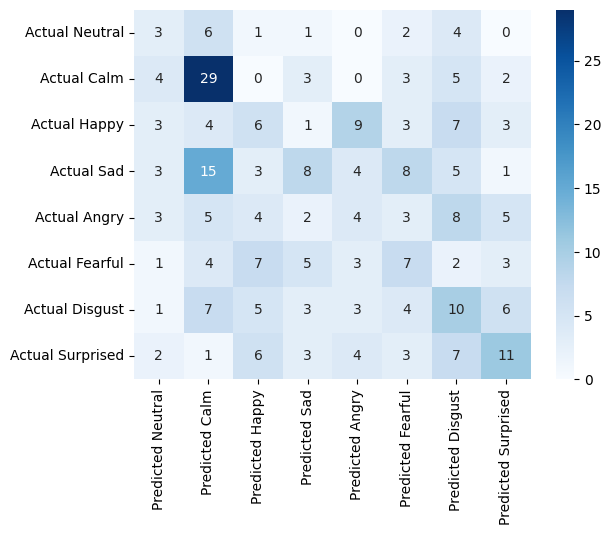

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import seaborn as sns

# Define function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    emotion_labels = ['Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgust', 'Surprised']
    labels = unique_labels(y_true)
    columns = [f'Predicted {emotion_labels[label]}' for label in labels]
    index = [f'Actual {emotion_labels[label]}' for label in labels]
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, columns=columns, index=index)
    sns.heatmap(cm_df, annot=True, cmap="Blues")

# Predict probabilities for test set
y_prob = model.predict(np.expand_dims(x_test, axis=-1))

# Get predicted labels from probabilities
y_pred = np.argmax(y_prob, axis=1)

# Plot confusion matrix
plot_confusion_matrix(np.argmax(y_test, axis=1), y_pred)


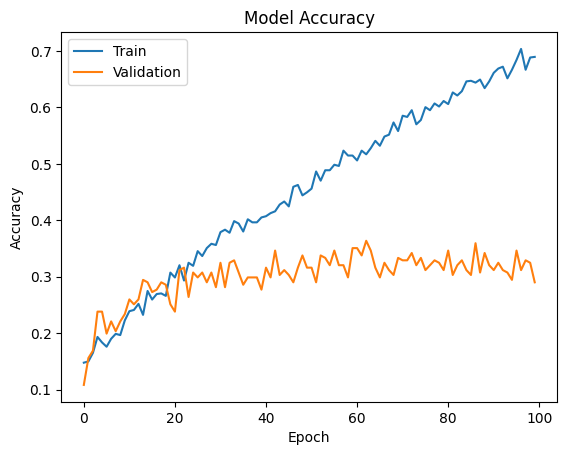

In [ ]:
import matplotlib.pyplot as plt

# Get accuracy values from history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot accuracy values
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


***RNN-LSTM***

In [ ]:
import numpy as np
import pandas as pd
import os
import librosa #audio signal processing, including loading and manipulating audio files, extracting features, and transforming audio signals.
import wave #reading and writing audio files in WAV format.
import matplotlib.pyplot as plt
# sklearn is a library used for training and evaluating classifiers.
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import keras #building and training neural networks.
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop # optimize the model during training


In [ ]:
def extract_mfcc(wav_file_name) :
  y, sr = librosa.load(wav_file_name)
  mfccs = np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0) #y: the audio signal, sr: the sample rate of the audio signal.

  return mfccs

In [ ]:

#load
ravdess_speech_labels=[] #store the labels for the audio data.
ravdess_speech_data=[] #store the audio data.
for dirname, _,filenames in os.walk('/content/drive/MyDrive/rav'):
  for filename in filenames :
    ravdess_speech_labels.append(int(filename[7:8]) - 1)
    wav_file_name=os.path.join(dirname, filename)
    ravdess_speech_data.append(extract_mfcc(wav_file_name))
print("finish loading the dataset")



finish loading the dataset


In [ ]:
ravdess_speech_data_array=np.asarray(ravdess_speech_data)
ravdess_speech_label_array=np.array(ravdess_speech_labels)
ravdess_speech_label_array.shape

labels_categorical = to_categorical(ravdess_speech_label_array)
labels_categorical.shape #shape is (n_samples, n_classes)

(1440, 8)

In [ ]:
ravdess_speech_data_array #Each row of the array corresponds to a single audio file, and each column corresponds to a single MFCC coefficient.

array([[-6.1610614e+02,  5.7966923e+01,  5.3546357e+00, ...,
         1.8013319e-01, -1.9805055e+00, -1.7081637e+00],
       [-6.4057367e+02,  6.7599525e+01,  1.6379452e+01, ...,
        -1.3570944e+00, -2.1565986e+00, -2.2783606e+00],
       [-4.9338995e+02,  3.6774818e+01, -2.4481893e+00, ...,
         1.3603927e+00,  1.5579828e+00,  1.6083817e+00],
       ...,
       [-5.5972192e+02,  2.6708374e+01, -7.2052693e+00, ...,
        -1.5713448e-02, -4.3990609e-01,  8.8578063e-01],
       [-4.6565955e+02,  1.2013585e+01, -1.9443050e+01, ...,
         9.2163610e-01,  7.3199517e-01,  2.0619860e+00],
       [-4.8713501e+02,  2.6173935e+01, -2.0055984e+01, ...,
         1.3486671e+00,  6.1949570e-02,  1.0963798e-01]], dtype=float32)

In [ ]:

x_train,x_test,y_train,y_test = train_test_split(np.array(ravdess_speech_data_array),labels_categorical,test_size=0.20,random_state=9)

In [ ]:
#split

number_of_samples=ravdess_speech_data_array.shape[0]
training_samples=int(number_of_samples*0.8)
validation_samples=int(number_of_samples*0.1)
test_samples=int(number_of_samples*0.1)

In [ ]:
#define LSTM model
def create_model_LSTM():
  model = Sequential() # creates an instance of a sequential model
  model.add(LSTM(128,return_sequences=False,input_shape=(40,1)))   #number of output units
  model.add(Dense(64)) #reduce the dimensionality of the output from the LSTM layer.
  model.add(Dropout(0.4)) #prevent overfitting
  model.add(Activation('relu')) #applied to the output of the first dense layer.
  model.add(Dense(32))
  model.add(Dropout(0.4))
  model.add(Activation('relu')) #applied to the output of the second dense layer.
  model.add(Dense(8)) #corresponds to the 8 different emotions in the RAVDESS dataset.
  model.add(Activation('softmax')) #produce a probability distribution over the 8 emotions.
#configure model for training
  model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
  return model



In [ ]:
w=np.expand_dims(ravdess_speech_data_array[:training_samples],-1)

In [ ]:
w.shape

(1152, 40, 1)

In [ ]:

#train using LSTM model
model_A=create_model_LSTM()
history=model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1),labels_categorical[:training_samples],validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=150, shuffle=True)

Epoch 1/150
36/36 [==============================] - 7s 75ms/step - loss: 2.0749 - accuracy: 0.1484 - val_loss: 2.0479 - val_accuracy: 0.1250
Epoch 2/150
36/36 [==============================] - 2s 53ms/step - loss: 2.0346 - accuracy: 0.1727 - val_loss: 1.9904 - val_accuracy: 0.1806
Epoch 3/150
36/36 [==============================] - 2s 53ms/step - loss: 1.9952 - accuracy: 0.2092 - val_loss: 1.9603 - val_accuracy: 0.1667
Epoch 4/150
36/36 [==============================] - 2s 51ms/step - loss: 1.9751 - accuracy: 0.2135 - val_loss: 1.9930 - val_accuracy: 0.1875
Epoch 5/150
36/36 [==============================] - 2s 59ms/step - loss: 1.9635 - accuracy: 0.2240 - val_loss: 1.9747 - val_accuracy: 0.1736
Epoch 6/150
36/36 [==============================] - 4s 101ms/step - loss: 1.9496 - accuracy: 0.2370 - val_loss: 1.9792 - val_accuracy: 0.1528
Epoch 7/150
36/36 [==============================] - 2s 57ms/step - loss: 1.9217 - accuracy: 0.2465 - val_loss: 1.9764 - val_accuracy: 0.2500
Epoch

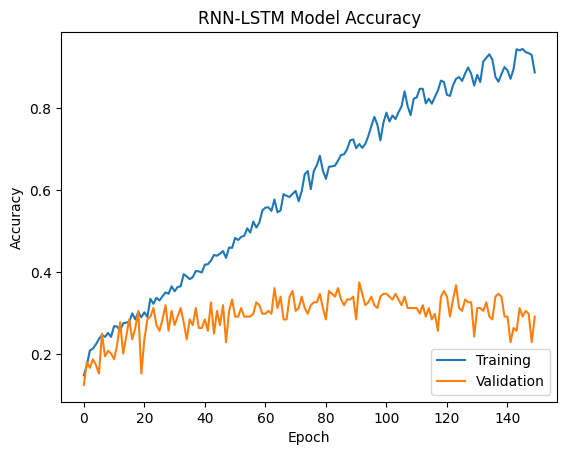

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('RNN-LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test data using the trained model
y_pred = model_A.predict(np.expand_dims(x_test, -1))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Print the confusion matrix as a table
print('Confusion Matrix:')
print(confusion_mtx)



9/9 [==============================] - 1s 58ms/step
Confusion Matrix:
[[ 0 12  0  4  1  0  0  0]
 [ 0 36  1  2  2  3  2  0]
 [ 0  0 26  0  2  2  2  4]
 [ 0 11  0 28  0  3  5  0]
 [ 0  0  8  1 18  2  4  1]
 [ 0  0  6  7  0 19  0  0]
 [ 0  0  0  1  2  1 28  7]
 [ 0  0  3  1  3  2  2 26]]


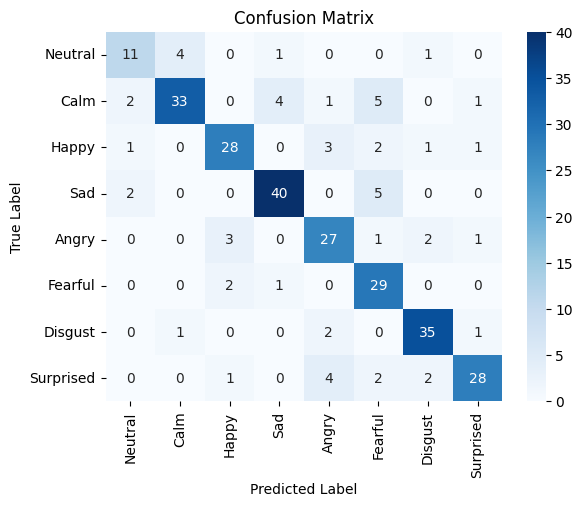

In [ ]:
# Define a list of emotion names
emotion_names = ['Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgust', 'Surprised']

# Plot the confusion matrix as a heatmap with labeled axes
sns.heatmap(confusion_mtx, annot=True, cmap='Blues', fmt='g',
            xticklabels=emotion_names, yticklabels=emotion_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
